# Porftolio Optimization Mix

## Import Libraries

In [1]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
#!pip install pandas_datareader
from pandas_datareader import DataReader

%matplotlib inline

In [2]:
df_stocks_top = pd.read_csv('df_stocks.csv')
df_stocks_random = pd.read_csv('df_stocks_random.csv')

In [3]:
df_stocks_top['Date'] =  pd.to_datetime(df_stocks_top['Date'], format='%Y-%m-%d')
df_stocks_random['Date'] =  pd.to_datetime(df_stocks_random['Date'], format='%Y-%m-%d')

In [4]:
df_stocks_top.set_index('Date', inplace=True)
df_stocks_random.set_index('Date', inplace=True)


In [5]:
df_stocks_random.tail()

APTV        BWA         CL        DRE        DVA         FIS  \
Date                                                                            
2018-11-30  71.900002  39.580002  63.520000  28.459999  66.059998  107.949997   
2018-12-03  74.709999  40.700001  63.759998  28.830000  66.379997  109.120003   
2018-12-04  71.580002  37.650002  63.080002  28.020000  64.070000  106.120003   
2018-12-06  69.870003  37.279999  63.230000  28.830000  61.820000  105.790001   
2018-12-07  67.089996  35.740002  62.709999  28.520000  58.959999  104.620003   

                   HP         TMO         UTX         VZ  
Date                                                      
2018-11-30  60.599998  249.550003  121.839996  60.299999  
2018-12-03  62.290001  251.979996  123.599998  58.160000  
2018-12-04  60.590000  243.889999  120.870003  58.090000  
2018-12-06  60.160000  242.039993  121.449997  58.080002  
2018-12-07  60.740002  235.860001  119.449997  57.680000

In [6]:
df_stocks = pd.concat([df_stocks_top, df_stocks_random], axis=1)

In [7]:
#new
df_stocks_1 = df_stocks[(df_stocks.index >= '2018-01-01') & (df_stocks.index <= '2018-09-01')]
display(df_stocks_1.head(3))
display(df_stocks_1.tail(3))

AAPL         AMZN       BRK-B          FB        GOOGL  \
Date                                                                       
2018-01-02  169.712067  1189.010010  197.220001  181.419998  1073.209961   
2018-01-03  169.682510  1204.199951  199.789993  184.669998  1091.520020   
2018-01-04  170.470703  1209.589966  200.690002  184.330002  1095.760010   

                   JNJ         JPM  MFST           V        XOM       APTV  \
Date                                                                         
2018-01-02  135.553314  105.532196   0.6  113.752068  81.646385  85.270493   
2018-01-03  136.848190  105.639740   0.7  114.884514  83.249924  86.686546   
2018-01-04  136.838440  107.153099   0.6  115.311668  83.365150  88.043190   

                  BWA         CL        DRE        DVA        FIS         HP  \
Date                                                                           
2018-01-02  51.009296  73.352936  26.109335  72.540001  92.849915  62.604782   
2018-01-03  51.265430  73.069839  26.031658  72.910004  93.394920  62.892170   
2018-01-04  52.930271  73.538429  25.536463  74.849998  94.088570  63.610672   

                   TMO         UTX         VZ  
Date                                           
2018-01-02  192.541733  125.344688  51.104603  
2018-01-03  196.073700  127.183388  50.054447  
2018-01-04  198.528107  127.584381  50.216743

AAPL         AMZN       BRK-B          FB        GOOGL  \
Date                                                                       
2018-08-29  222.204681  1998.099976  211.270004  175.899994  1264.650024   
2018-08-30  224.247559  2002.380005  209.750000  177.639999  1254.439941   
2018-08-31  226.838531  2012.709961  208.720001  175.729996  1231.800049   

                   JNJ         JPM   MFST           V        XOM       APTV  \
Date                                                                          
2018-08-29  134.006638  114.955002  0.080  146.766479  80.048531  90.517555   
2018-08-30  134.096054  114.388962  0.080  146.477005  79.702042  88.692848   
2018-08-31  133.837708  113.783203  0.055  146.626740  79.365448  87.755569   

                  BWA         CL        DRE        DVA         FIS         HP  \
Date                                                                            
2018-08-29  44.832939  66.517464  28.245451  73.050003  107.744209  65.415459   
2018-08-30  44.148540  65.802223  28.116432  66.510002  107.385262  65.732002   
2018-08-31  43.581001  65.971100  28.275227  69.290001  107.853889  64.861511   

                   TMO         UTX         VZ  
Date                                           
2018-08-29  239.562973  132.858017  53.972427  
2018-08-30  239.023361  131.833893  54.150455  
2018-08-31  238.933426  130.948975  53.774616

In [8]:
log_return_1 = np.log(df_stocks_1/df_stocks_1.shift(1))

In [9]:
log_return_1.mean() * len(log_return_1)

AAPL     0.291862
AMZN     0.529494
BRK-B    0.057011
FB      -0.032056
GOOGL    0.138643
JNJ     -0.012813
JPM      0.075727
MFST    -2.403820
V        0.255380
XOM     -0.028503
APTV     0.028898
BWA     -0.158323
CL      -0.106697
DRE      0.080167
DVA     -0.046110
FIS      0.150685
HP       0.035624
TMO      0.217157
UTX      0.044001
VZ       0.051230
dtype: float64

In [10]:
log_return_1.cov() * len(log_return_1)

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ       JPM  \
AAPL   0.035867  0.018490  0.017097  0.019658  0.022789  0.010408  0.015386   
AMZN   0.018490  0.046430  0.017382  0.033505  0.027791  0.009066  0.018456   
BRK-B  0.017097  0.017382  0.031046  0.018984  0.024913  0.016480  0.025055   
FB     0.019658  0.033505  0.018984  0.104487  0.034297  0.010823  0.018687   
GOOGL  0.022789  0.027791  0.024913  0.034297  0.045009  0.017204  0.023384   
JNJ    0.010408  0.009066  0.016480  0.010823  0.017204  0.027068  0.014927   
JPM    0.015386  0.018456  0.025055  0.018687  0.023384  0.014927  0.031851   
MFST   0.072993  0.073304  0.041625  0.091449  0.050980  0.033047  0.027339   
V      0.019569  0.021738  0.019711  0.026724  0.026958  0.014054  0.018396   
XOM    0.011351  0.007946  0.016608  0.015710  0.019510  0.012684  0.013729   
APTV   0.020590  0.021870  0.021461  0.029853  0.025029  0.015358  0.020848   
BWA    0.016096  0.013768  0.024282  0.016754  0.023794  0.018482  0.025577   
CL     0.005305  0.001611  0.006704  0.000299  0.005722  0.010462  0.003812   
DRE    0.008983  0.005408  0.009702  0.005407  0.011936  0.008326  0.006189   
DVA    0.011542  0.010374  0.013448  0.009844  0.014500  0.010585  0.012694   
FIS    0.010907  0.013322  0.014186  0.015960  0.018061  0.011758  0.013745   
HP     0.010899  0.012541  0.015052  0.011606  0.014321  0.011439  0.014788   
TMO    0.015829  0.016962  0.018060  0.011707  0.022404  0.013503  0.017120   
UTX    0.014374  0.014993  0.018616  0.014312  0.020263  0.013503  0.016165   
VZ     0.005748  0.006298  0.013708  0.006492  0.009269  0.014031  0.011498   

           MFST         V       XOM      APTV       BWA        CL       DRE  \
AAPL   0.072993  0.019569  0.011351  0.020590  0.016096  0.005305  0.008983   
AMZN   0.073304  0.021738  0.007946  0.021870  0.013768  0.001611  0.005408   
BRK-B  0.041625  0.019711  0.016608  0.021461  0.024282  0.006704  0.009702   
FB     0.091449  0.026724  0.015710  0.029853  0.016754  0.000299  0.005407   
GOOGL  0.050980  0.026958  0.019510  0.025029  0.023794  0.005722  0.011936   
JNJ    0.033047  0.014054  0.012684  0.015358  0.018482  0.010462  0.008326   
JPM    0.027339  0.018396  0.013729  0.020848  0.025577  0.003812  0.006189   
MFST   6.384473  0.053744  0.010553 -0.005913 -0.010777 -0.018290  0.019496   
V      0.053744  0.028071  0.015051  0.020392  0.017527  0.005259  0.011387   
XOM    0.010553  0.015051  0.029682  0.016504  0.017723  0.005668  0.010449   
APTV  -0.005913  0.020392  0.016504  0.051984  0.037663  0.005282  0.009255   
BWA   -0.010777  0.017527  0.017723  0.037663  0.054630  0.008128  0.007456   
CL    -0.018290  0.005259  0.005668  0.005282  0.008128  0.020979  0.008562   
DRE    0.019496  0.011387  0.010449  0.009255  0.007456  0.008562  0.023380   
DVA   -0.043957  0.010674  0.009583  0.015531  0.017134  0.010716  0.006625   
FIS    0.018475  0.015118  0.010297  0.011762  0.011937  0.005334  0.009833   
HP     0.075646  0.011983  0.023231  0.016930  0.022643  0.002241  0.002928   
TMO   -0.012442  0.017878  0.015439  0.020839  0.020531  0.007891  0.009454   
UTX    0.004657  0.015271  0.014065  0.023614  0.021533  0.006892  0.006896   
VZ     0.041994  0.007842  0.008575  0.006520  0.011625  0.011229  0.008096   

            DVA       FIS        HP       TMO       UTX        VZ  
AAPL   0.011542  0.010907  0.010899  0.015829  0.014374  0.005748  
AMZN   0.010374  0.013322  0.012541  0.016962  0.014993  0.006298  
BRK-B  0.013448  0.014186  0.015052  0.018060  0.018616  0.013708  
FB     0.009844  0.015960  0.011606  0.011707  0.014312  0.006492  
GOOGL  0.014500  0.018061  0.014321  0.022404  0.020263  0.009269  
JNJ    0.010585  0.011758  0.011439  0.013503  0.013503  0.014031  
JPM    0.012694  0.013745  0.014788  0.017120  0.016165  0.011498  
MFST  -0.043957  0.018475  0.075646 -0.012442  0.004657  0.041994  
V      0.010674  0.015118  0.011983  0.017878  0.015271  0.007842  
XOM    0.00

In [11]:
np.random.seed(101)
num_of_ite_1 = 50000
all_weights_1 = np.zeros((num_of_ite_1,len(log_return_1.columns)))
port_return_1 = np.zeros(num_of_ite_1)
port_vol_1 = np.zeros(num_of_ite_1)
sharpe_ratio_1 = np.zeros(num_of_ite_1)

for i in range(num_of_ite_1):
    weights = np.array(np.random.random(20))
    weights = weights / np.sum(weights)
    all_weights_1[i,:] = weights
    port_return_1[i] = np.sum((log_return_1.mean() * weights) *len(log_return_1))
    port_vol_1[i] = np.sqrt(np.dot(weights.T, np.dot(log_return_1.cov() * len(log_return_1), weights)))
    sharpe_ratio_1[i] = port_return_1[i]/port_vol_1[i]

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

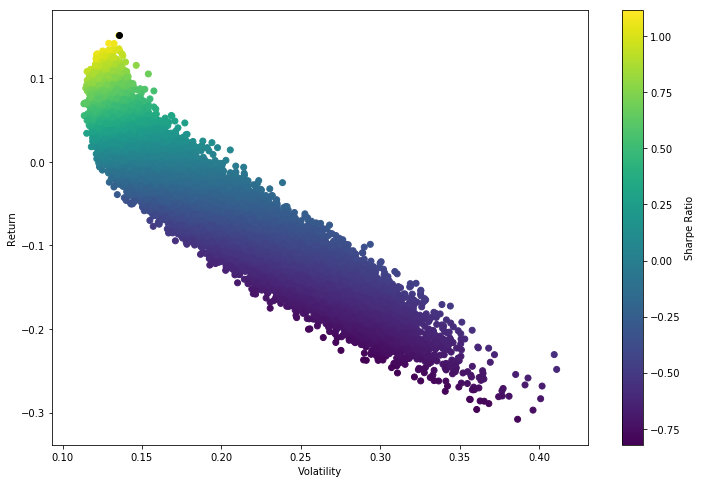

In [12]:
max_port_return_1 = port_return_1[sharpe_ratio_1.argmax()]
max_port_vol_1 = port_vol_1[sharpe_ratio_1.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_1,y=port_return_1,c=sharpe_ratio_1)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(x=max_port_vol_1,y=max_port_return_1,c='black')

## Mathematical Optimization for Asset Allocation

In [13]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return_1.mean() * weights) * len(log_return_1)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return_1.cov() * len(log_return_1), weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

### Maximum Sharpe Ratio

In [14]:
#def neg_sharpe(weights):
#    return  get_ret_vol_sr(weights)[2] * -1

In [15]:
#def check_sum(weights):
#    return np.sum(weights) - 1

In [16]:
#cons = ({'type':'eq','fun': check_sum})
#noa = len(log_return_1.columns)
#bounds = tuple((0, 1) for x in range(noa))
#init_guess = noa * [1. / noa,]
#opt_results_1 = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [17]:
#opt_ret_vol_sr_1 = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
#names = ['Return', 'Volatility', 'Sharpe Ratio']
#opt_ret_vol_sr_1.columns=names
#opt_ret_vol_sr_1

In [18]:
#optimal_sharpe_1 = pd.DataFrame(opt_results['x'].round(4)).T
#optimal_sharpe_1.columns=list(log_return_1.columns)
#optimal_sharpe_1

### Alternative way to maximize Sharpe Ratio 

In [19]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return_1.mean()*weights)*len(log_return_1)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return_1.cov()*len(log_return_1),weights)))
    return np.array([pret,pvol,pret/pvol])

In [20]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1

In [21]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(log_return_1.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [22]:
opts_1 = sco.minimize(min_func_sharpe, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [23]:
port_weights_1 = opts_1.x.round(4)

In [24]:
optimal_sharpe_1 = pd.DataFrame(opts_1['x'].round(4)).T
optimal_sharpe_1.columns=list(log_return_1.columns)
optimal_sharpe_1

AAPL    AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST    V  XOM  APTV  BWA  \
0  0.2163  0.7837    0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   

    CL  DRE  DVA  FIS   HP  TMO  UTX   VZ  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [25]:
# Optimal shape for the first backtest
optimal_sharpe_out_1 = optimal_sharpe_1.transpose()
optimal_sharpe_out_1.sort_values(by=[0], ascending=False).head(5)

0
AMZN  0.7837
AAPL  0.2163
UTX   0.0000
TMO   0.0000
HP    0.0000

In [26]:
optimal_ret_vol_sr_1 = pd.DataFrame(statistics(opts_1['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr_1.columns=names
optimal_ret_vol_sr_1

Return  Volatility  Sharpe Ratio
0  0.4781      0.1909        2.5037

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  0.993475  0.978088  1.010521  0.976747  0.989920  1.016004   
2018-09-06  0.976966  0.960187  1.013473  0.949579  0.977446  1.023557   
2018-09-07  0.969084  0.957127  1.018995  0.952559  0.972162  1.026922   
2018-09-10  0.956078  0.950723  1.024089  0.959219  0.970074  1.026099   

                 JPM      MFST         V       XOM      APTV       BWA  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  0.995137  0.656250  0.965291  1.013327  0.979550  1.010728   
2018-09-06  0.990881  1.000000  0.977672  1.002117  0.974035  1.008217   
2018-09-07  0.992792  0.903125  0.968877  1.019180  0.968865  0.996804   
2018-09-10  0.987495  0.937500  0.974831  1.017686  0.982537  1.010728   

                  CL       DRE       DVA       FIS        HP       TMO  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  1.020849  1.013224  0.991282  0.987670  0.979955  1.001356   
2018-09-06  1.027135  1.019657  1.002216  0.997497  0.955201  0.998644   
2018-09-07  1.027288  1.015011  0.993499  0.996106  0.953379  0.999619   
2018-09-10  1.029588  1.023231  0.995715  1.007880  0.962035  1.004829   

                 UTX        VZ  
Date                            
2018-09-04  1.000000  1.000000  
2018-09-05  1.006672  1.011844  
2018-09-06  1.012282  1.020681  
2018-09-07  1.000834  1.015228  
2018-09-10  1.013268  1.017485

Date
2018-11-01    850479.10106
Name: Total Pos, dtype: float64


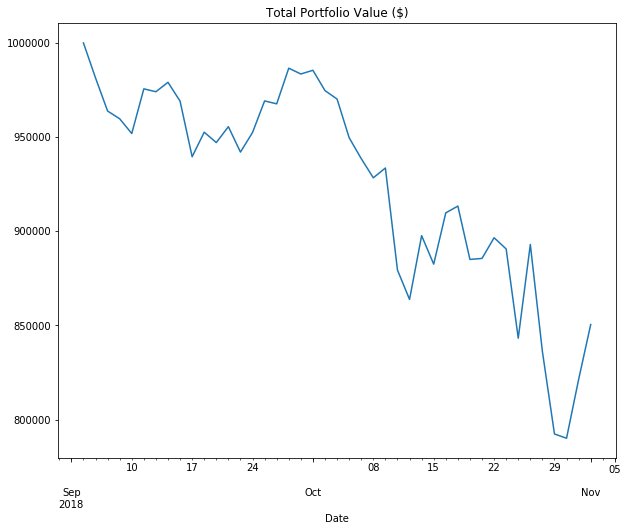

In [27]:
## Backtest 1
df_forecast_1 = df_stocks[(df_stocks.index >= '2018-09-01') & (df_stocks.index <= '2018-11-01')]

df_returns = []

for elements in df_forecast_1:
    #print (elements)
    df_returns.append(df_forecast_1[elements]/ df_forecast_1.iloc[0][elements])

df = pd.DataFrame(df_returns)

df_norm = df.transpose()

display(df_norm.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc = []


for allocation in df_norm:
    
    df_alloc.append(df_norm[allocation] * optimal_sharpe_1.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc = pd.DataFrame(df_alloc)

df_alloc = df_alloc.transpose() * 1000000

df_alloc.tail()

df_alloc['Total Pos'] = df_alloc.sum(axis = 1)

df_alloc.head()

df_alloc['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc['Total Pos'].tail(1))

In [28]:
# restricting the dataset for Optimization 2
df_opt_2 = df_stocks[(df_stocks.index >= '2018-01-01') & (df_stocks.index <= '2018-11-01')]
df_opt_2.tail()
log_return_2 = np.log(df_opt_2/df_opt_2.shift(1))

In [29]:
# Optimization 2
np.random.seed(101)
num_of_ite = 50000
all_weights_2 = np.zeros((num_of_ite,len(df_opt_2.columns)))
port_return_2 = np.zeros(num_of_ite)
port_vol_2 = np.zeros(num_of_ite)
sharpe_ratio_2 = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(len(df_opt_2.columns)))
    weights = weights / np.sum(weights)
    all_weights_2[i,:] = weights
    port_return_2[i] = np.sum((log_return_2.mean() * weights) *len(log_return_2))
    port_vol_2[i] = np.sqrt(np.dot(weights.T, np.dot(log_return_2.cov() * len(log_return_2), weights)))
    sharpe_ratio_2[i] = port_return_2[i]/port_vol_2[i]

Text(0, 0.5, 'Expected Return')

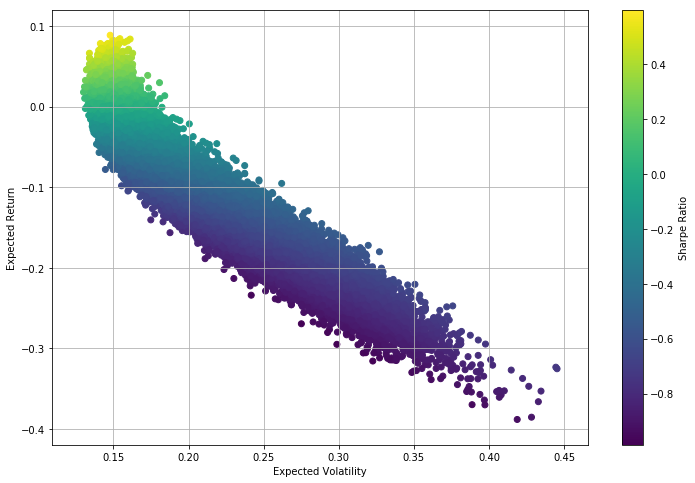

In [30]:
# Distribution of the simulated Portfolio (II)
max_port_return_2 = port_return_2[sharpe_ratio_2.argmax()]
max_port_vol_2 = port_vol_2[sharpe_ratio_2.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_2,y=port_return_2,c=sharpe_ratio_2)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [31]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return_2.mean()*weights)*len(log_return_2)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return_2.cov()*len(log_return_2),weights)))
    return np.array([pret,pvol,pret/pvol])

In [32]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(df_opt_2.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

opts = sco.minimize(min_func_sharpe, x0, method='SLSQP',bounds=bnds, constraints=cons)


In [33]:
# Optimal shape for the second backtest
optimal_sharpe_2 = pd.DataFrame(opts['x'].round(4)).T
optimal_sharpe_2.columns=list(df_opt_2.columns)
optimal_sharpe_2

AAPL    AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST    V  XOM  APTV  BWA  \
0  0.3775  0.2781    0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   

    CL  DRE  DVA  FIS   HP     TMO  UTX      VZ  
0  0.0  0.0  0.0  0.0  0.0  0.1328  0.0  0.2116

In [34]:
# Optimal shape for the second backtest
optimal_sharpe_out = optimal_sharpe_2.transpose()
optimal_sharpe_out.sort_values(by=[0], ascending=False).head(5)

0
AAPL  0.3775
AMZN  0.2781
VZ    0.2116
TMO   0.1328
FB    0.0000

In [35]:
# Vloatility, Return, Sharpe Ratio (Backtest II)
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns=names
optimal_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  0.2406      0.1727        1.3931

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  0.933669  1.000000  1.003449  0.990774  0.986657  0.999006   
2018-11-05  0.907164  0.977347  1.050423  0.979769  0.972145  1.009800   
2018-11-06  0.916974  0.986359  1.061449  0.988073  0.984889  1.012427   
2018-11-07  0.944784  1.054013  1.074711  0.998550  1.020498  1.027908   

                 JPM      MFST         V       XOM      APTV       BWA  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  0.994494  2.436782  0.992544  1.015867  1.026085  0.983918   
2018-11-05  1.001009  2.229885  0.992686  1.012024  0.982696  0.959552   
2018-11-06  1.005689  1.609195  0.999716  1.016363  0.989042  0.974172   
2018-11-07  1.022940  2.758621  1.028048  1.029255  1.014684  0.980019   

                  CL       DRE       DVA       FIS        HP       TMO  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  1.003495  0.990291  0.987305  0.997114  0.980061  1.002354   
2018-11-05  1.002497  1.002517  1.000584  1.000192  1.025888  1.012240   
2018-11-06  1.007157  1.014024  1.010506  1.006926  1.031999  1.019558   
2018-11-07  1.020806  1.026609  1.110171  1.032612  1.056601  1.050800   

                 UTX        VZ  
Date                            
2018-11-01  1.000000  1.000000  
2018-11-02  0.998824  1.010348  
2018-11-05  0.997413  1.020696  
2018-11-06  1.002822  1.020696  
2018-11-07  1.023280  1.028546

AAPL           AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST  \
Date                                                                          
2018-11-30  258906.517624  240017.312021    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-03  267953.320601  251688.923929    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-04  256166.383481  236925.799668    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-06  253310.262132  241298.207722    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-07  244277.971382  231349.150996    0.0  0.0    0.0  0.0  0.0   0.0   

              V  XOM  APTV  BWA   CL  DRE  DVA  FIS   HP            TMO  UTX  \
Date                                                                           
2018-11-30  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  120624.332051  0.0   
2018-12-03  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  121798.911253  0.0   
2018-12-04  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  117888.470890  0.0   
2018-12-06  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  116994.238280  0.0   
2018-12-07  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  114007.031390  0.0   

                       VZ  
Date                       
2018-11-30  193606.977534  
2018-12-03  186736.018679  
2018-12-04  186511.268604  
2018-12-06  186479.166699  
2018-12-07  185194.870059

AAPL           AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST  \
Date                                                                          
2018-11-01  321055.860650  236518.238005    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-02  299760.007879  236518.238005    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-05  291250.334287  231160.286876    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-06  294399.952158  233291.825185    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-07  303328.577822  249293.253212    0.0  0.0    0.0  0.0  0.0   0.0   

              V  XOM      ...        BWA   CL  DRE  DVA  FIS   HP  \
Date                      ...                                       
2018-11-01  0.0  0.0      ...        0.0  0.0  0.0  0.0  0.0  0.0   
2018-11-02  0.0  0.0      ...        0.0  0.0  0.0  0.0  0.0  0.0   
2018-11-05  0.0  0.0      ...        0.0  0.0  0.0  0.0  0.0  0.0   
2018-11-06  0.0  0.0      ...        0.0  0.0  0.0  0.0  0.0  0.0   
2018-11-07  0.0  0.0      ...        0.0  0.0  0.0  0.0  0.0  0.0   

                      TMO  UTX             VZ      Total Pos  
Date                                                          
2018-11-01  112943.624621  0.0  179961.377784  850479.101060  
2018-11-02  113209.478157  0.0  181823.606688  831311.330729  
2018-11-05  114326.055633  0.0  183685.823344  820422.500140  
2018-11-06  115152.609729  0.0  183685.823344  826530.210416  
2018-11-07  118681.193104  0.0  185098.552098  856401.576235  

[5 rows x 21 columns]

Date
2018-12-07    774829.023827
Name: Total Pos, dtype: float64


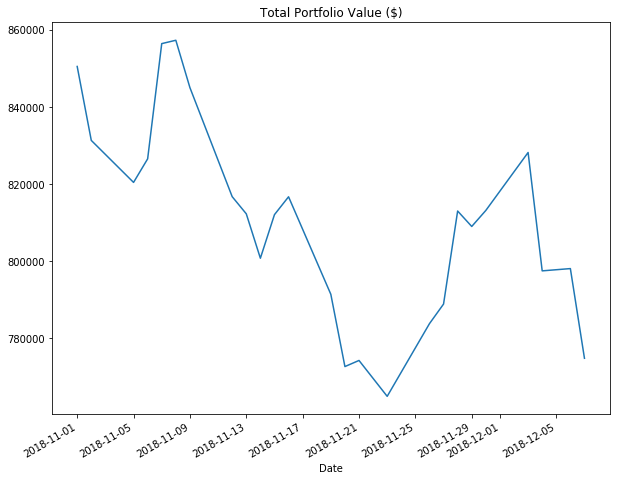

In [36]:
c
#df_forecast_2 = df_stocks[(df_stocks.index >= '2018-05-01')]
df_forecast_2 = df_stocks[(df_stocks.index >= '2018-11-01') & (df_stocks.index <= '2018-12-07')]

df_returns_2 = []

for elements in df_forecast_2:
    #print (elements)
    df_returns_2.append(df_forecast_2[elements]/ df_forecast_2.iloc[0][elements])


df = pd.DataFrame(df_returns_2)
df_norm_2 = df.transpose()
display(df_norm_2.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc_2 = []

for allocation in df_norm_2:
    
    df_alloc_2.append(df_norm_2[allocation] * optimal_sharpe_2.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc_2 = pd.DataFrame(df_alloc_2)

total_value_1 = df_alloc['Total Pos'].iloc[-1]
total_value_1

df_alloc_2 = df_alloc_2.transpose() * total_value_1

display(df_alloc_2.tail())

df_alloc_2['Total Pos'] = df_alloc_2.sum(axis = 1)

display(df_alloc_2.head())

df_alloc_2['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc_2['Total Pos'].tail(1))